In [2]:
import yfinance as yf
import pandas as pd
import numpy as np

In [12]:
start_dates = []
end_dates = []
for _ in range(2010,2018+1):
    start_date = str(_) + "-09-01"
    start_dates.append(start_date)
    end_date = str(_) + "-12-20"
    end_dates.append(end_date)

In [13]:
def cumulative_return(year:int,tickers:[str]):
    import matplotlib.pyplot as plt
    from matplotlib.dates import DateFormatter
    import matplotlib.dates as mdates
    %matplotlib inline
    fig, ax = plt.subplots(figsize=(12, 8))
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    ax.xaxis.set_major_formatter(DateFormatter("%m-%d-%Y"))
    year = str(year)
    for ticker in tickers_str:
        start_date,end_date = year + "-01-01", str(int(year)+1) + "-01-31"
        data = yf.download(ticker , start = start_date , end = end_date)
        data['Daily_return']=data['Close']/data['Close'].shift(1)-1
        data['Daily_return_pct'] = data['Close'].pct_change(1)
        data['Daily_return_log'] = np.log(data['Close']/data['Close'].shift(1))
        # Cumulative Returns
        data[ ticker] = np.cumsum(data['Daily_return'])
        data[ ticker][1:].plot() # skip first line
    plt.legend()
    plt.suptitle('Cumulative Return', fontsize=20)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


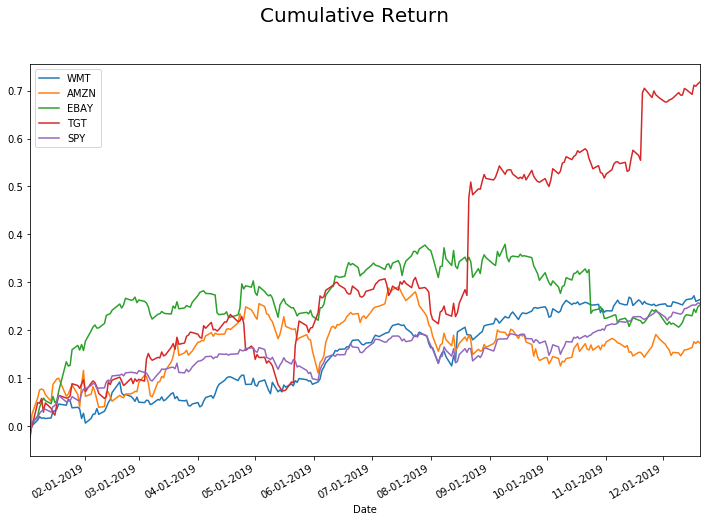

In [14]:
tickers_str = ["WMT","AMZN","EBAY","TGT","SPY"]
cumulative_return(2019,tickers_str)

In [36]:
def bollinger_band(mean_window: int, std_dev_window: int, tickers: [str], start_year: int, end_year: int):
    import matplotlib.pyplot as plt
    %matplotlib inline
    for ticker in tickers:
        start_date, end_date = str(start_year) + "-01-01",  str(end_year) + "-12-31"
        df = yf.download(ticker , start = start_date , end = end_date)
        MA_col_name = str(mean_window) + '_MA_Close'
        std_dev_col_name = str(std_dev_window) + '_std_close'
        df[MA_col_name] = df['Close'].rolling(window=mean_window).mean()
        #calculating 20 days rolling standard devtaion
        df[std_dev_col_name] = df['Close'].rolling(window=std_dev_window).std()
        df['Upper'] = df[MA_col_name] + 2*df[std_dev_col_name]
        df['Lower'] = df[MA_col_name] - 2*df[std_dev_col_name]
        
        
        
        df[['Close',MA_col_name,'Upper','Lower']].plot(figsize=(10,5))
        plt.suptitle(ticker, fontsize=20)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


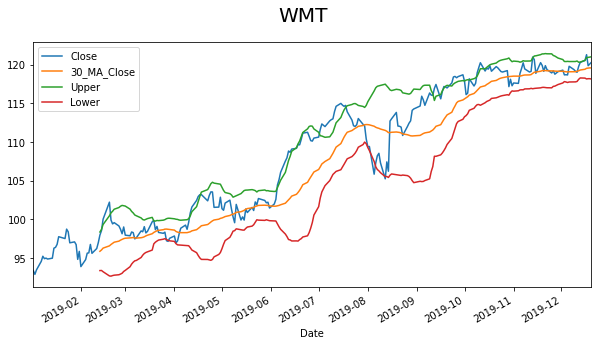

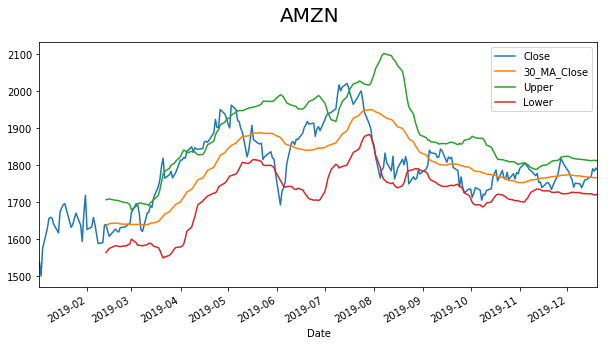

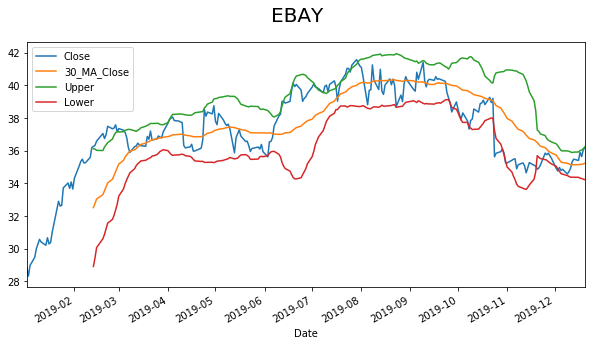

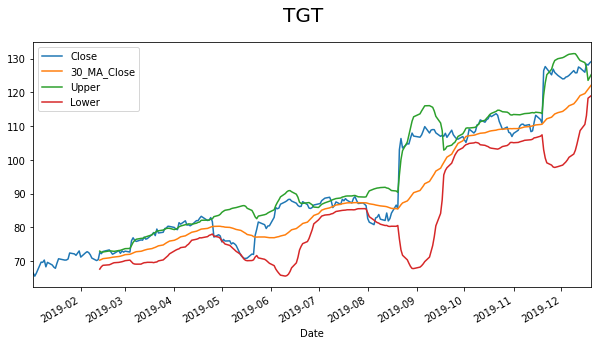

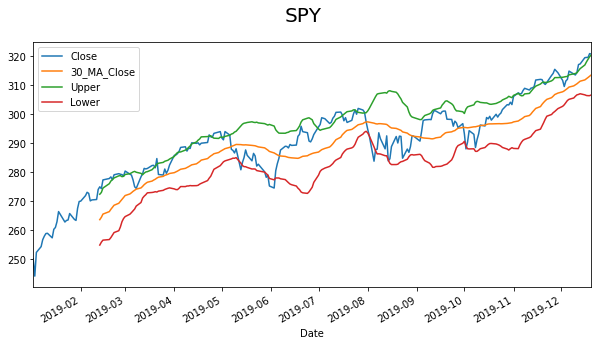

In [40]:
bollinger_band(30, 20, tickers_str,2019,2019)

In [41]:
# show actions (dividends, splits)
msft.actions

# show dividends
msft.dividends

# show splits
msft.splits

# show financials
msft.financials
msft.quarterly_financials

# show major holders
stock.major_holders

# show institutional holders
stock.institutional_holders

# show balance heet
msft.balance_sheet
msft.quarterly_balance_sheet

# show cashflow
msft.cashflow
msft.quarterly_cashflow

# show earnings
msft.earnings
msft.quarterly_earnings

# show sustainability
msft.sustainability

# show analysts recommendations
msft.recommendations

# show next event (earnings, etc)
msft.calendar

# show options expirations
msft.options

class Stock():
    def __init__(self, name, age):
        self.hist =  wmt.history(period="3mo")
        #self.age = age
        #self.speed = 0
        #self.moving = False


NameError: name 'msft' is not defined